In [1]:
import seaborn as sns
import pandas as pd

data_path = '../data/csv/bikeshare.csv'



In [2]:
with open(data_path, encoding='utf-8') as f:
    rows = f.readlines()
print(rows[0])

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count



# Read data from csv file(CSV stands for Comma Separated)

판다스로 읽어보자

In [4]:
source = pd.read_csv(data_path)
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


DataFrame에서 Column을 가져 올 때, dict처럼 접근함.

In [6]:
datetime = pd.DatetimeIndex(source['datetime'])
print(datetime)

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)


In [7]:
source['year'] = datetime.year
source['month'] = datetime.month
source['hour'] = datetime.hour
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


Boolean으로 된 칼럼도 만들 수 있다. 참고로 판다스에서는 파이썬의 and가 아닌 &를 사용한다.

In [9]:
# 데이타임인지 아닌지 여부
source['daytime'] = (7 <= source.hour) & (source.hour <= 28)
source.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,daytime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,False


<class 'seaborn.axisgrid.FacetGrid'>


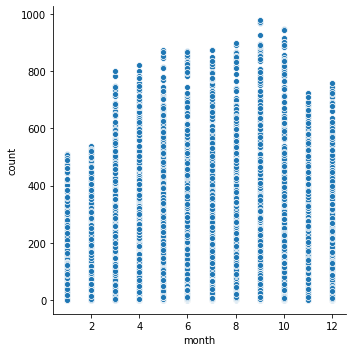

In [11]:
fig = sns.relplot(x='month', y='count', kind='scatter', data=source)
print(type(fig))

놀기 좋은 8, 9, 10월에 자전거를 많이 빌린다.  
다만 이 그래프는 분포를 알기 어렵다. 따라서 `Boxplot`을 이용해 시즌 별 대여개수의 추이를 알아보고, outlier를 알아보자.  
[참고-Boxplot](https://en.wikipedia.org/wiki/Box_plot)

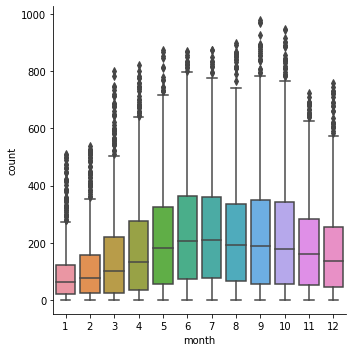

In [14]:
# 월별 추이
fig = sns.catplot(x='month', y='count', kind='box', data=source)

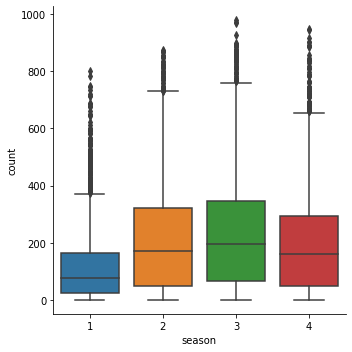

In [15]:
# 시즌별 추이
fig = sns.catplot(x='season', y='count', kind='box', data=source)

각 시즌 별 최대값도 확인해볼 수 있다.

In [16]:
for season in source['season'].unique():
    max_value = source[source['season'] == season]['count'].max()
    print(f'season={season}, max={max_value}')

season=1, max=801
season=2, max=873
season=3, max=977
season=4, max=948


Categorical var를 dummy로 변환해보자.  

In [18]:
season_dummies = pd.get_dummies(source.season, prefix='season')
season_dummies.sample(n=5, random_state=0)

,season_1,season_2,season_3,season_4
6638,1,0,0,0
7975,0,1,0,0
5915,1,0,0,0
8050,0,1,0,0
5894,1,0,0,0


월별 대여량이 다르므로 월별도 만든다.

In [19]:
month_dummies = pd.get_dummies(source.month, prefix='month')
month_dummies.sample(n=5, random_state=0)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6638,0,0,1,0,0,0,0,0,0,0,0,0
7975,0,0,0,0,0,1,0,0,0,0,0,0
5915,0,1,0,0,0,0,0,0,0,0,0,0
8050,0,0,0,0,0,1,0,0,0,0,0,0
5894,0,1,0,0,0,0,0,0,0,0,0,0


pandas.concat으로 여러 데이터프레임을 축 기준으로 이어 붙인다.

In [25]:
source_train = pd.concat([source, season_dummies, month_dummies], axis=1)
source_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
source_train.corr().head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,...,-0.405488,-0.137008,-0.137255,-0.137255,0.133671,0.133671,0.133431,0.404355,0.404355,0.404597
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,...,-0.051514,0.043914,-0.051856,-0.051856,0.043677,-0.051856,0.043914,0.043756,0.043756,-0.051856
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,...,0.018977,-0.015611,0.036307,0.002164,-0.014907,0.036307,-0.032708,0.001938,-0.015142,0.002164
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,...,-0.002106,0.006627,0.051996,-0.052107,-0.077740,-0.031705,0.035442,0.052241,-0.028361,0.035256
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,...,-0.166893,-0.058596,0.094824,0.265221,0.411819,0.368932,0.214944,0.027268,-0.195689,-0.248378


In [28]:
source_train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
hour          0.400601
daytime       0.558727
season_1     -0.237704
season_2      0.075681
season_3      0.136942
season_4      0.023704
month_1      -0.166108
month_2      -0.135275
month_3      -0.071981
month_4      -0.012354
month_5       0.046551
month_6       0.084233
month_7       0.073038
month_8       0.071023
month_9       0.070374
month_10      0.060271
month_11      0.003509
month_12     -0.026644
Name: count, dtype: float64

여기서 모델링에 필요한 피처만 뽑는다.

In [33]:
features = (
    ['temp', 'weather', 'humidity', 'daytime'] +
    [f'season_{s}' for s in range(1, 5)] + 
    [f'month_{m}' for m in range(1, 13)]
)

X = source_train[features]
y = source_train['count']

print(X.shape)
print(y.shape)

(10886, 20)
(10886,)


In [37]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.01)
model.fit(X, y)

print(f'intercept : {model.intercept_:.6}')
for i, var in enumerate(features):
    print(f'{var} : {model.coef_[i]:.6}')

intercept : 10.4415
temp : 8.34171
weather : -17.1903
humidity : -1.47808
daytime : 180.055
season_1 : -15.4033
season_2 : 0.85919
season_3 : -19.1559
season_4 : 33.7001
month_1 : -10.5983
month_2 : -4.27064
month_3 : -0.534415
month_4 : -4.29572
month_5 : 18.3696
month_6 : -13.2147
month_7 : -32.8659
month_8 : -16.385
month_9 : 30.0949
month_10 : 10.1184
month_11 : 8.29433
month_12 : 15.2873


변수 별 스케일이 달라 영향력 판단이 어렵다. 따라서 0 ~ 1 사이로 정규화 해보자.

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[0.22448979591836735 0.0 0.81 ... 0.0 0.0 0.0]
 [0.20408163265306123 0.0 0.8 ... 0.0 0.0 0.0]
 [0.20408163265306123 0.0 0.8 ... 0.0 0.0 0.0]
 ...
 [0.32653061224489793 0.0 0.61 ... 0.0 0.0 1.0]
 [0.32653061224489793 0.0 0.61 ... 0.0 0.0 1.0]
 [0.3061224489795918 0.0 0.66 ... 0.0 0.0 1.0]]


In [40]:
model2 = Ridge(alpha=0.1)
model2.fit(X_scaled, y)

print(f'intercept : {model2.intercept_:.6}')
for i, var in enumerate(features):
    print(f'{var} : {model2.coef_[i]:.6}')

intercept : 0.259777
temp : 334.791
weather : -51.5619
humidity : -147.81
daytime : 180.075
season_1 : -15.4574
season_2 : 0.877739
season_3 : -19.0946
season_4 : 33.6742
month_1 : -10.641
month_2 : -4.29554
month_3 : -0.520896
month_4 : -4.32787
month_5 : 18.3725
month_6 : -13.1669
month_7 : -32.8232
month_8 : -16.3546
month_9 : 30.0832
month_10 : 10.1501
month_11 : 8.27239
month_12 : 15.2517
